# Transformadas de algunas funciones singulares

A continuación se muestran las transformadas de algunas funciones con
las que se trabajará frecuentemente más adelante ya que pueden ser
asimiladas como las perturbaciones más frecuentes.

Si no se dice lo contrario todas estas funciones se definen para que su
valor sea nulo a tiempo menor que cero.

## Función escalón

Es una función cuyo valor para tiempos menores que cero es nulo y que
alcanza el valor $M$ para tiempo mayores que 0:

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Función escalón de altura $M$.
```

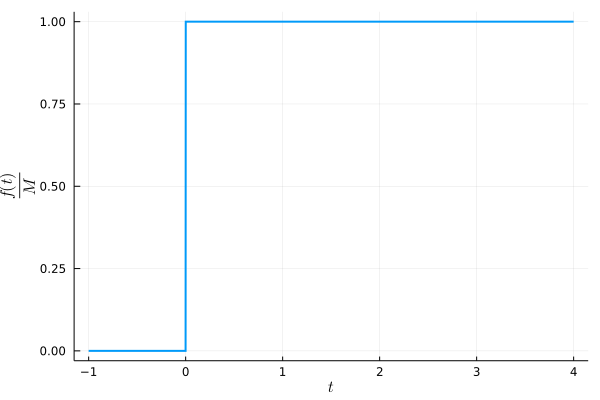

In [1]:
using SymPy, Plots, LaTeXStrings

t = symbols("t")

plot(Heaviside(t), -1, 4, lw=2, legend=false,
     ylabel = L"\frac{f(t)}{M}",
     xlabel = L"t")

Esta función se define como:

$$f (t) = \left\{\begin{array}{ll}
     0 & t < 0\\
     M & t > 0
   \end{array}\right.$$

La transformada de Laplace de esta función es:

$$\mathcal{L} [f (t)] = \frac{M}{s}$$

Si $M$ es igual a 1 se habla de la función escalón unidad, $U(t)$, o de la función de Heaviside, $\theta(t)$.

Encontrar la transformada inversa de Laplace es muy sencillo utilizando *Sympy*:

In [2]:
# Definición de las variables que vamos a utilizar
M, t, s = symbols("M t s")

# Definimos un escalón unidad de altura M
f = M*Heaviside(t)

# Calculamos la trasnformada inversa de Laplace
sympy.laplace_transform(f, t, s, noconds=True)

M
─
s

En el cálculo anterior, se ha utilizado la función de ```Heaviside``` como función escalón unidad. También se puede realizar el cálculo definiendo la función escalón como una constante $M$ y asumiendo de manera implicita que ese valor es solo para $t > 0$:

In [3]:
# Definimos un escalón unidad de altura M
f = M

# Calculamos la trasnformada inversa de Laplace
sympy.laplace_transform(f, t, s, noconds=True)

M
─
s

Aunque la mayor parte de las veces las funciones de entrada sucende a tiempo 0, no es raro que aparezcan desplazadas en el tiempo, que sufran un retraso $t_0$.

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Función pulso unidad retrasada en el tiempo un valor $t_0$.
```

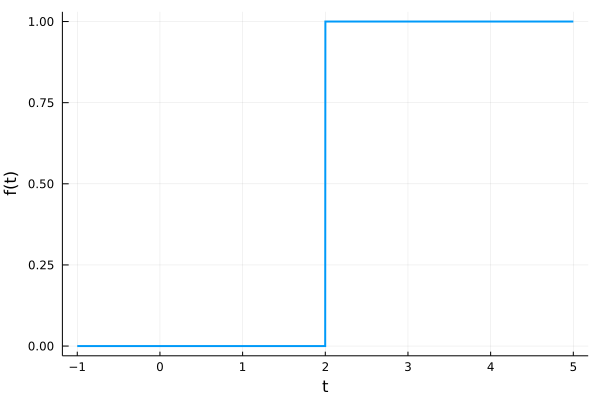

In [4]:
plot(Heaviside(t-2), -1, 5, lw=2, legend=false,
     xlabel="t", ylabel="f(t)")

En el caso de que la función tenga un retraso $t_0$:

$$f (t) = \left\{\begin{array}{ll}
     0 & t < t_0\\
     M & t > t_0
   \end{array}\right.$$

O lo que es lo mismo:

$$f (t - t_0) = \left\{\begin{array}{ll}
     0 & t < 0\\
     M & t > 0
   \end{array}\right.$$

Por tanto, aplicando la propiedad de la transformada de Laplace, (ecuación {eq}`translacion`), la transformada de Laplace será:

$$\mathcal{L} [f (t - t_0)] = \frac{M}{s} \mathrm{e}^{- s t_0}$$

## Función pulso

Se trata de una función pulso con área $A = M t_0$. A continuación, en la figura de la derecha se muestra un pulso de altura unidad, $M=1$. El pulso (línea roja) es la suma de un pulso unidad (línea verde) al que se le suma un pulso de altura -1 retrasado un tiempo igual a la anchura del pulso, es decir, $t_0$:

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Un pulso, figura de la derecha, es la resta de dos funciones escalón de igual altura. El escalón negativo (azul) anula al escalón verde y forma el pulso (naranja).
```

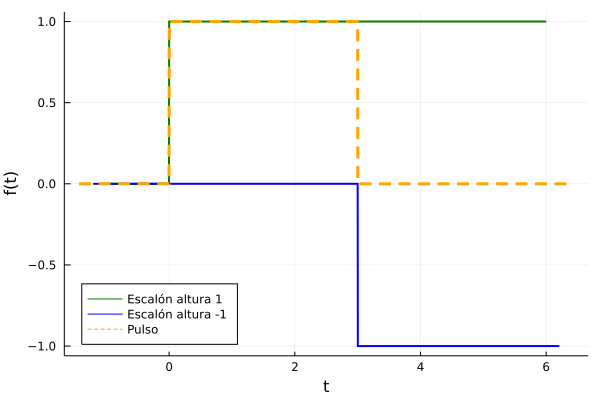

In [5]:
to = 3
plot(Heaviside(t), -1, 6, color="green", lw=2,
    label="Escalón altura 1",
    xlabel="t", ylabel="f(t)", legend=:bottomleft)
plot!(-Heaviside(t-to), color="blue", lw=2,
     label="Escalón altura -1")
plot!(Heaviside(t)-Heaviside(t-to), color="orange",
    linestyle=:dash, lw=3, label="Pulso")


La función pulso se define como:

$$f (t) = \left\{\begin{array}{cc}
     0 & t < 0\\
     M & 0 < t < t_0\\
     0 & t > t_0
   \end{array}\right.$$

Utilizando la definición del escalón unidad también se puede escribir
como:

$$f (t) = M [U (t) - U (t - t_0)]$$

Por tanto, la transformada de Laplace será:

$$\mathcal{L} [f (t)] = \bar{f} (s) = M \left( \frac{1}{s} - \frac{\mathrm{e}^{-
   s t_0}}{s} \right) = \frac{M}{s}  (1 - \mathrm{e}^{- s t_0})$$

## Función impulso

Se trata de un pulso de área $A$ tal que $M \rightarrow \infty$ y
$t_0 \rightarrow 0$:

```{figure} ./img/impulso.svg
---
width: 300px
figclass: margin-caption
---
Función impulso de área $A$.
```

La transformada de Laplace de esta función es:

$$\mathcal{L} [f (t)] = \bar{f} (s) = A$$

En el caso particular de que el área sea 1 se habla de la función delta
de Dirac $\delta (t)$.

A continuación se calcula la transformada de Laplace de un impulso de altura A, $f(t) = A \delta(t)$:

In [6]:
A = symbols("A")

sympy.laplace_transform(A*DiracDelta(t), t, s, noconds=True)

A⋅(1 - θ(0))

Se puede comprobar fácilmente que el impulso es la derivada de la
función escalón.

```{admonition} Ejemplo
En el Problema 3.4 se puede comprobar las diferencias y similitudes en
la respuesta de un proceso a una entrada en escalón y en impulso.
```

## Función rampa

Se trata de una función lineal de pendiente $M$:

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Función rampa de pendiente $M$.

Se puede modificar el valor de $M$ utilizando el deslizador (solo cuando se visualiza el *notebook*).
```

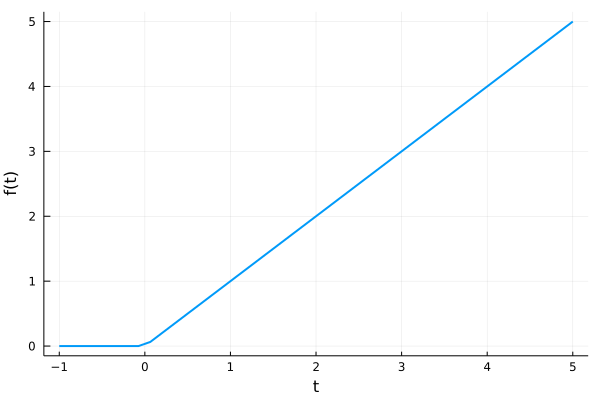

In [7]:
plot(t*Heaviside(t), -1, 5, lw=2,
    xlabel="t", ylabel="f(t)",
    legend=false)

Esta función se define como:

$$f (t) = \left\{\begin{array}{ll}
     0 & t < 0\\
     M t & t > 0
   \end{array}\right. = M t U (t)$$

La transformada de Laplace es:

$$\mathcal{L} [M t U (t)] = \frac{M}{s^2}$$

In [8]:
sympy.laplace_transform(M*t, t, s, noconds=True)

M 
──
 2
s 

## Funciones trigonométricas

La función seno es:

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Función seno de frecuencia $\omega$.

Se puede modificar el valor de $\omega$ utilizando el deslizador (solo cuando se visualiza el *notebook*).
```

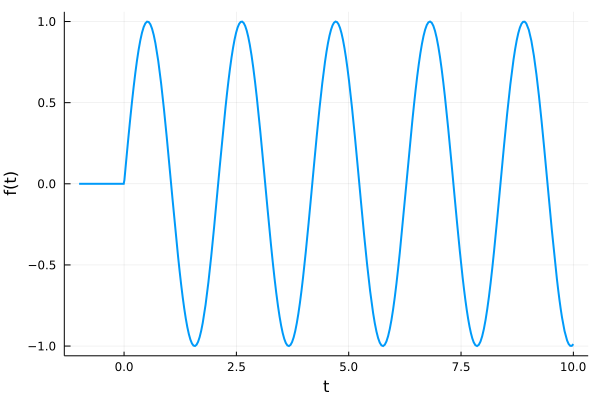

In [9]:
plot(sin(3*t)*Heaviside(t), -1, 10, 
     xlabel="t", ylabel="f(t)", lw=2, legend=false)

Se define la función como:

$$f (t) = \left\{\begin{array}{cl}
     0 & t < 0\\
     M \sin (\omega t) & t > 0
   \end{array}\right. = M U (t) \sin (\omega t)$$
   
donde $M$ es la amplitud y $\omega$ es la frecuencia angular, expresada
normalmente como rad/s.

La transformada de Laplace de la función seno es:

$$\mathcal{L} [M \sin (\omega t)] = \frac{M \omega}{s^2 + \omega^2}$$

y la de la función coseno:

$$\mathcal{L} [M \cos (\omega t)] = \frac{M s}{s^2 + \omega^2}$$

In [12]:
w = symbols("omega")

sympy.laplace_transform(M*sin(w*t), t, s, noconds=True)

  M⋅ω  
───────
 2    2
ω  + s 